In [72]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os
import scipy.io
import numpy as np
import pandas as pd
import math
from sklearn.cluster import SpectralClustering

In [86]:
def SegmentImages(trainDataPath,trainGroundTruth):
    
    
    for filename in glob.glob(trainDataPath+"\\"+"*.jpg"): 
        #reading files from training data
        
        
        img = mpimg.imread(filename,format="jpg")
        
        rows = len(img)
        cols = len(img[0])
    
        labels , clusters = Kmeans(img,3)
        print("Image After Clustering ")
        plt.imshow(labels)
        plt.show()
        
        labelsAs1D = np.reshape(labels,154401)
        
        #print(f" {labelsAs1D}")

        
        
        
        #reading files from ground truth
        filename_w_ext = os.path.basename(filename)
        imageName, file_extension = os.path.splitext(filename_w_ext) 
        mat = scipy.io.loadmat(trainGroundTruth+"\\"+imageName+".mat")
        
        
        
        numberOfImages = len(mat['groundTruth'][0])
        fig , ax = plt.subplots(1,numberOfImages+1)
        ax[0].imshow(img)
        
        for k in range(0,numberOfImages,1):
            groundImage = mat['groundTruth'][0][k][0][0][0]
            ax[k+1].imshow(groundImage)
            
        plt.show()
        
        for i in range(0,numberOfImages,1):
            groundImage = mat['groundTruth'][0][i][0][0][0]
            groundTruthAs1D = np.reshape(groundImage,154401)
            matrix = pd.crosstab(labelsAs1D,groundTruthAs1D, rownames=['labels'], colnames=['img'])
            #print(matrix)
            #converting DataFrame to Numpy Array
            matrix = matrix.values
            fScore = getFScore(matrix)
            conditionalEntropy = getConditionalEntropy(matrix)
            print(f"Scores against groundTruth image {i}:")
            print("fScore is ",fScore)
            print("conditionalEntropy ",conditionalEntropy)
            print("\n\n")

In [88]:
def Kmeans(arr, K):

    centroids = generateCentroids(arr,K)
    while(True):
        labels = np.zeros((len(arr),len(arr[0])))
        labels, newMeans = getLabels(arr,labels,len(arr),len(arr[0]),K,centroids)
        newMeans = np.array(newMeans)
        
        if isEqual(newMeans,centroids):
            break
        else:
            centroids = newMeans
    
    return labels , newMeans
    

In [75]:
def getFScore(matrix):
    fScore = 0
    for i in range(0,len(matrix),1):
        rowSum = sum(matrix[i])
        idx = matrix[i].argsort()[::-1]
        #max element
        maxElement = matrix[i][idx[0]]
        sumArray = np.sum(matrix,axis=0)
        colSum = sumArray[idx[0]]
        score = ((2*maxElement) /(rowSum+colSum))
        fScore = fScore +score
    return (1/len(matrix))*fScore
        
    

In [76]:
def getConditionalEntropy(matrix):
    entropy = 0
    for i in range(0,len(matrix),1):
        rowSum = sum(matrix[i])
        classEntropy = 0
        for j in range(0,len(matrix[0]),1):
            if(matrix[i][j] == 0):
                classEntropy = classEntropy + 0
            else:
                element = (matrix[i][j]/rowSum) * math.log2(matrix[i][j]/rowSum)
                classEntropy = classEntropy - element
        temp = (rowSum / 154401)*classEntropy
        entropy = entropy + temp
    
    return entropy
        

In [89]:
def assignLabels(pixel,K,centroids):
    min = 1000000
    index = -1
    for i in range(0,K,1):
        temp = eucl_dist(pixel,centroids[i])
        if temp < min:
            min = temp
            index = i
            
    return index

In [90]:
def getLabels(arr,labels,rows,columns,K,centroids):
    
    accumlatorClustering = intializeArray(len(centroids))
    accumlatorClustering = np.array(accumlatorClustering)
    
    counters  = []
    newMeans  = []
    for k in range(0,len(centroids),1):
        counters.append(0)
        newMeans.append(0)
    
    counters = np.array(counters)
    
    for i in range(0,rows,1):
        for j in range(0,columns,1):
            labels[i][j] = assignLabels(arr[i][j],K,centroids)
            accumlatorClustering[int(labels[i][j])] = accumlatorClustering[int(labels[i][j])] + arr[i][j]
            counters[int(labels[i][j])] = counters[int(labels[i][j])] + 1
            
    for n in range(0,len(centroids),1):
        if(counters[n] == 0 ):
            newMeans[n] = accumlatorClustering[n]
        else:
            newMeans[n] = accumlatorClustering[n] // counters[n]
        
        
    
            
    return labels,newMeans

In [91]:
def generateCentroids(arr,K):
    centroids = []
    for i in range(0,K,1):
        centroids.append(randomizePoints(arr))
    centroids = np.array(centroids)
    return centroids

In [92]:
def randomizePoints(arr):
    return arr[np.random.randint(0,len(arr))][np.random.randint(0,len(arr[0]))]   

In [81]:
def eucl_dist(a, b):
    a = a.astype(float)
    b = b.astype(float)
    return np.linalg.norm(a - b)

In [95]:
def isEqual(arr1,arr2):
    flag = 1
    for i in range(0, len(arr1), 1):
        for j in range(0, 3, 1):
            if arr1[i][j] != arr2[i][j]:
                flag = 0
                break
    return flag

In [94]:
def intializeArray(size):
    
    arr = []
    for i in range (0,size,1):
        new = []
        for j in range (0, 3):
            new.append(0)
        arr.append(new)
    return arr

In [84]:
trainDataPath = os.getcwd() + "\\data\\images\\train"
trainGroundTruth = os.getcwd() + "\\data\\groundTruth\\train"

Image After Clustering 


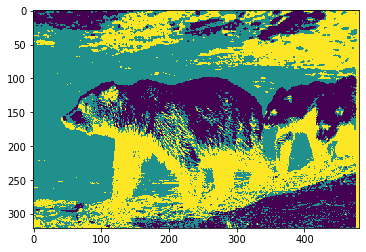

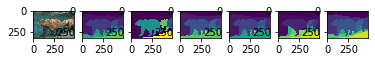

Scores against groundTruth image 0:
fScore is  0.46215779659682577
conditionalEntropy  2.3331256494596837



Scores against groundTruth image 1:
fScore is  0.48798563108143045
conditionalEntropy  1.4276187292937526



Scores against groundTruth image 2:
fScore is  0.4639875260060016
conditionalEntropy  2.2959506494975046



Scores against groundTruth image 3:
fScore is  0.4657706293200341
conditionalEntropy  2.3012968114898156



Scores against groundTruth image 4:
fScore is  0.47255768478216187
conditionalEntropy  2.6586141749299776



Scores against groundTruth image 5:
fScore is  0.4603762482636079
conditionalEntropy  2.352705415994026





In [96]:
SegmentImages(trainDataPath,trainGroundTruth)